In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error, mean_squared_error

sns.set_style('whitegrid')

In [2]:
#Importing the dataset
df_car = pd.read_csv("/Users/Shreeya/Downloads/car details/car data.csv")

In [3]:
# Displaying the first 10 rows from the dataset
df_car.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [4]:
# Dimensions of the data(rows and columns)
df_car.shape

(301, 9)

In [5]:
# Datatype of every column
df_car.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [6]:
#Checking for the total null values if any in the column
df_car.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
column_names= df_car.columns.tolist()
column_names

['Car_Name',
 'Year',
 'Selling_Price',
 'Present_Price',
 'Kms_Driven',
 'Fuel_Type',
 'Seller_Type',
 'Transmission',
 'Owner']

In [8]:
new_column_names = [name.lower() for name in column_names]

In [9]:
new_column_names

['car_name',
 'year',
 'selling_price',
 'present_price',
 'kms_driven',
 'fuel_type',
 'seller_type',
 'transmission',
 'owner']

In [10]:
df_car.columns =new_column_names

In [11]:
df_car.head()

,car_name,year,selling_price,present_price,kms_driven,fuel_type,seller_type,transmission,owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [12]:
df_car["reduced_price"]=df_car['present_price']-df_car['selling_price']

In [13]:
df_car.head()

,car_name,year,selling_price,present_price,kms_driven,fuel_type,seller_type,transmission,owner,reduced_price
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2.24
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,4.79
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2.60
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,1.30
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2.27


In [14]:
df_car['reduced_ratio'] = np.round(df_car["reduced_price"]/ df_car['present_price'],2)

In [15]:
df_car.head()

,car_name,year,selling_price,present_price,kms_driven,fuel_type,seller_type,transmission,owner,reduced_price,reduced_ratio
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2.24,0.40
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,4.79,0.50
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2.60,0.26
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,1.30,0.31
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2.27,0.33


In [16]:
df_car['years_used']=2023 - df_car['year']

In [17]:
df_car.head()

,car_name,year,selling_price,present_price,kms_driven,fuel_type,seller_type,transmission,owner,reduced_price,reduced_ratio,years_used
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2.24,0.40,9
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,4.79,0.50,10
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2.60,0.26,6
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,1.30,0.31,12
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2.27,0.33,9


In [18]:
def unique_value_count(df: pd.DataFrame):
    df_nunique= df.nunique().reset_index()
    df_nunique['data_type'] = df.dtypes.reset_index().loc[:,0]
    df_nunique.columns = ['column','nunique','data_type']
    
    display(df_nunique)

In [19]:
unique_value_count(df=df_car)

,column,nunique,data_type
0,car_name,98,object
1,year,16,int64
2,selling_price,156,float64
3,present_price,147,float64
4,kms_driven,206,int64
5,fuel_type,3,object
6,seller_type,2,object
7,transmission,2,object
8,owner,3,int64
9,reduced_price,258,float64


In [20]:
df_car.describe()

,year,selling_price,present_price,kms_driven,owner,reduced_price,reduced_ratio,years_used
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189,2.967176,0.365947,9.372093
std,2.891554,5.082812,8.644115,38886.883882,0.247915,4.828771,0.202416,2.891554
min,2003.000000,0.100000,0.320000,500.000000,0.000000,0.030000,0.010000,5.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000,0.390000,0.210000,7.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000,1.640000,0.350000,9.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000,3.350000,0.490000,11.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000,57.600000,0.890000,20.000000


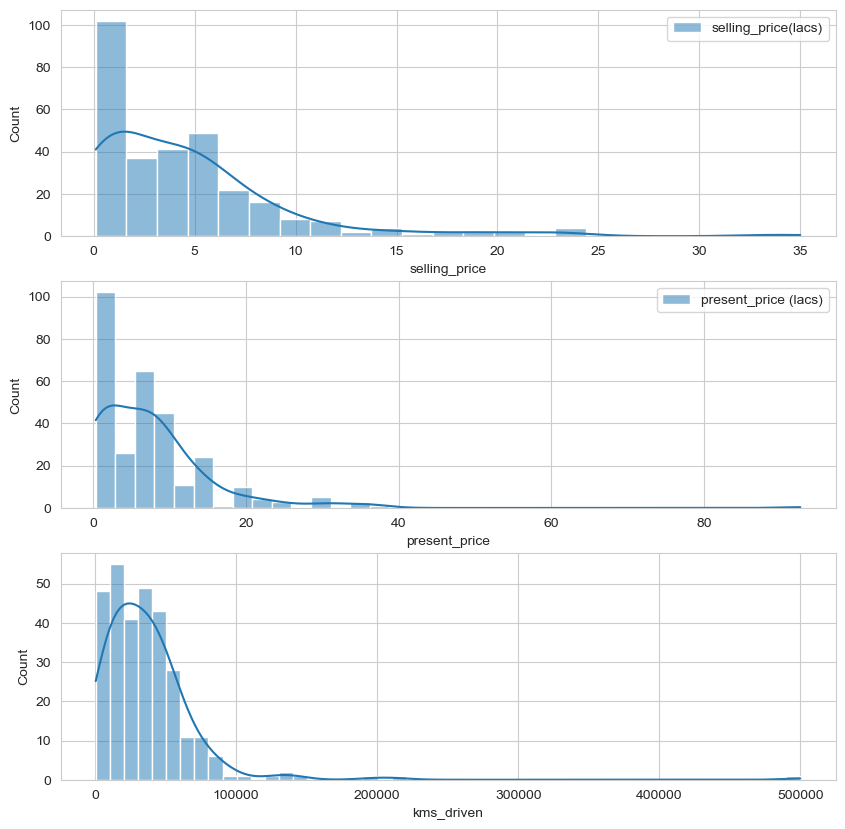

In [21]:
plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
sns.histplot(x = 'selling_price', data = df_car, kde = True, 
             label= "selling_price(lacs)")
plt.legend()
 
plt.subplot(3,1,2)
sns.histplot(x = 'present_price', data = df_car, kde = True, 
             label = 'present_price (lacs)' )
plt.legend()

plt.subplot(3,1,3)
sns.histplot( x = 'kms_driven', data = df_car, kde = True)
plt.show()

In [22]:
df_car.query("present_price<2").head()

,car_name,year,selling_price,present_price,kms_driven,fuel_type,seller_type,transmission,owner,reduced_price,reduced_ratio,years_used
100,Royal Enfield Thunder 500,2016,1.75,1.90,3000,Petrol,Individual,Manual,0,0.15,0.08,7
101,UM Renegade Mojave,2017,1.70,1.82,1400,Petrol,Individual,Manual,0,0.12,0.07,6
102,KTM RC200,2017,1.65,1.78,4000,Petrol,Individual,Manual,0,0.13,0.07,6
103,Bajaj Dominar 400,2017,1.45,1.60,1200,Petrol,Individual,Manual,0,0.15,0.09,6
104,Royal Enfield Classic 350,2017,1.35,1.47,4100,Petrol,Individual,Manual,0,0.12,0.08,6


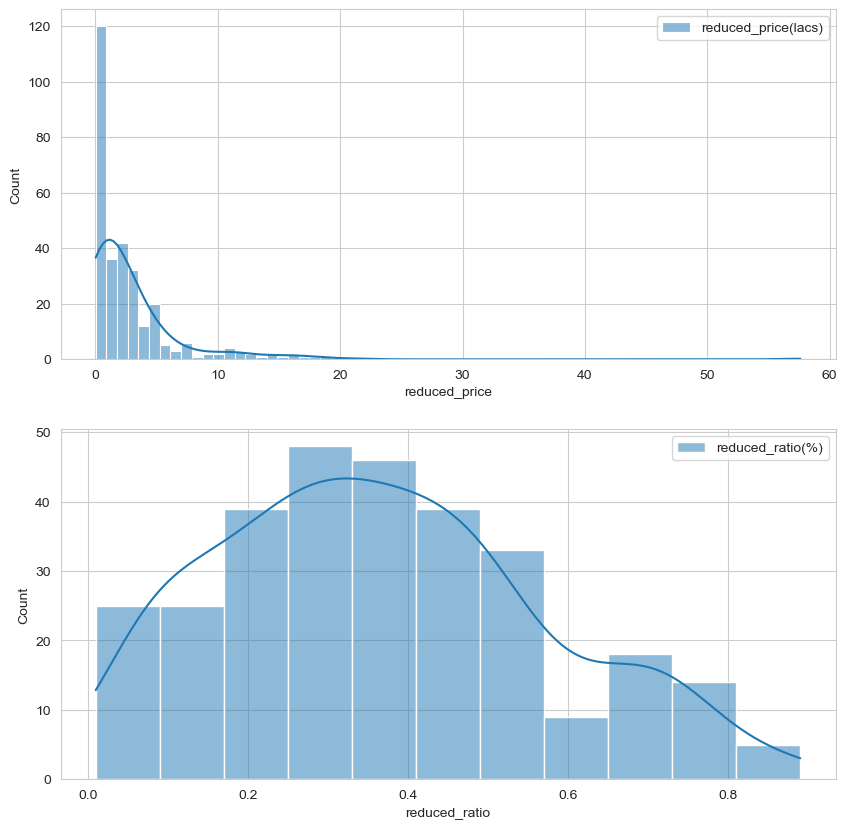

In [23]:
plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
sns.histplot(x = 'reduced_price', data = df_car, kde = True,
             label = 'reduced_price(lacs)')
plt.legend()

plt.subplot(2,1,2)
sns.histplot( x = 'reduced_ratio', data = df_car, kde = True,
            label = 'reduced_ratio(%)')
plt.legend()

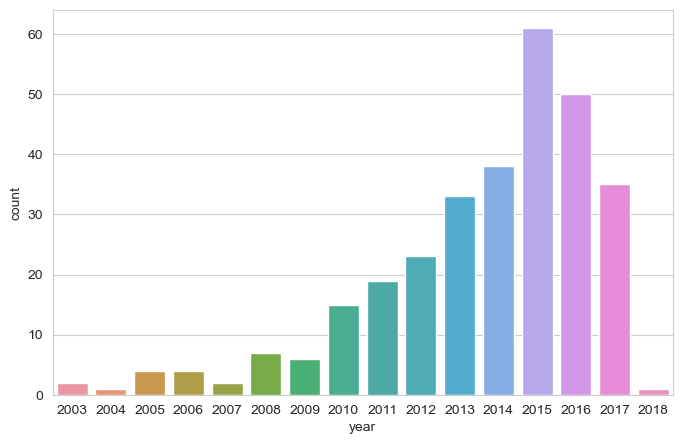

In [24]:
plt.figure(figsize=(8,5))
sns.countplot(x = "year", data = df_car)
plt.show()

<Axes: xlabel='owner', ylabel='count'>

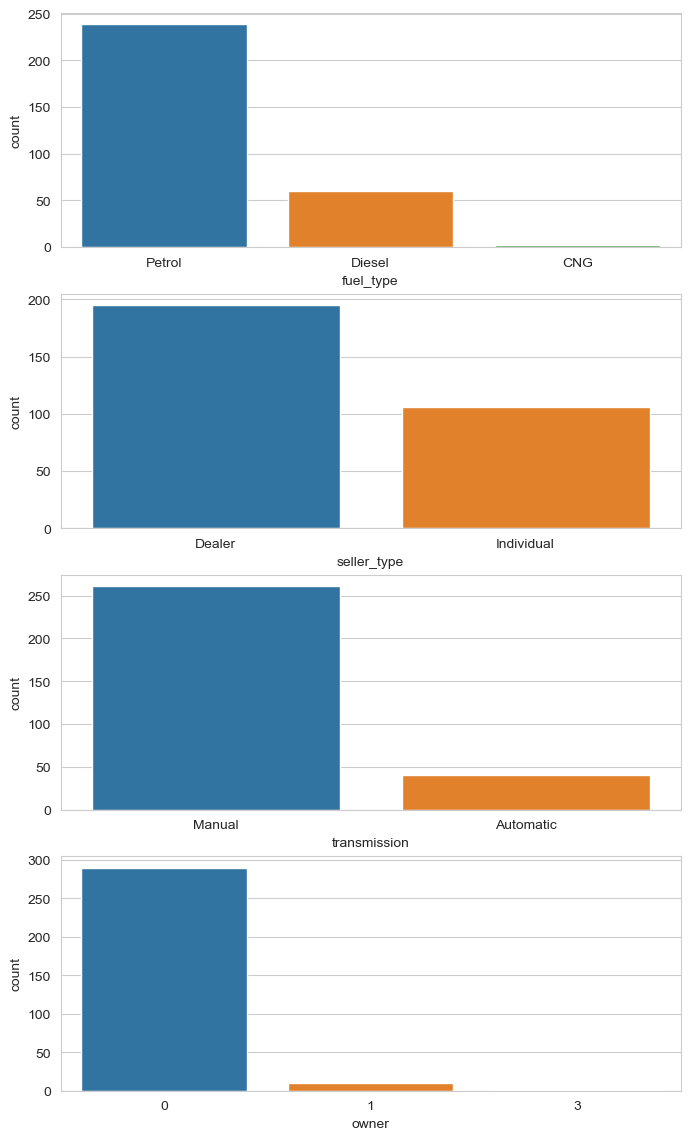

In [25]:
plt.figure(figsize=(8,14))

plt.subplot(4,1,1)
sns.countplot( x = 'fuel_type', data = df_car)

plt.subplot(4,1,2)
sns.countplot( x = 'seller_type', data = df_car)

plt.subplot(4,1,3)
sns.countplot( x = 'transmission', data = df_car)

plt.subplot(4,1,4)
sns.countplot( x = 'owner', data = df_car)


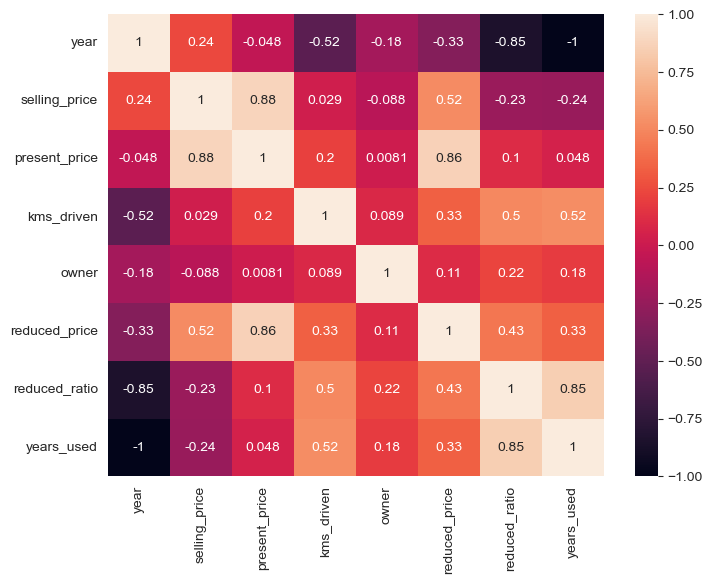

In [26]:
plt.figure(figsize=(8,6))
sns.heatmap(df_car.corr(numeric_only=True), annot=True)
plt.show()

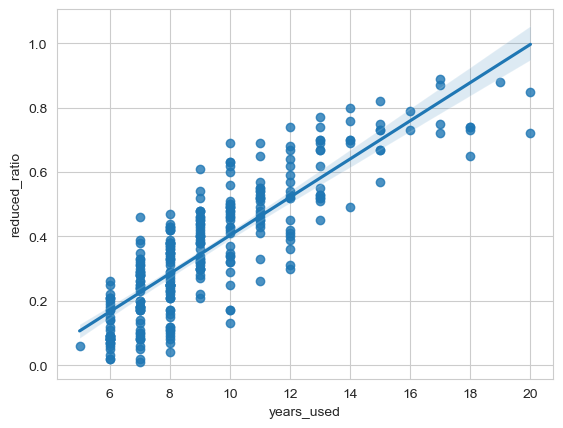

In [27]:
sns.regplot( x = 'years_used', y = 'reduced_ratio', data = df_car)
plt.show()

In [28]:
fuel_type_encode = pd.get_dummies(df_car['fuel_type'],dtype=int,
                                  drop_first=True)
fuel_type_encode_cols = fuel_type_encode.columns.tolist()
fuel_type_encode_cols

['Diesel', 'Petrol']

In [29]:
transmission_encode = pd.get_dummies(df_car['transmission'],dtype=int,
                                    drop_first=True)
transmission_encode_cols = transmission_encode.columns.tolist()
transmission_encode_cols

['Manual']

In [30]:
df_car = df_car.join(fuel_type_encode, how = 'inner')\
                .join(transmission_encode, how = 'inner')


In [31]:
df_car.head()

,car_name,year,selling_price,present_price,kms_driven,fuel_type,seller_type,transmission,owner,reduced_price,reduced_ratio,years_used,Diesel,Petrol,Manual
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2.24,0.40,9,0,1,1
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,4.79,0.50,10,1,0,1
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2.60,0.26,6,0,1,1
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,1.30,0.31,12,0,1,1
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2.27,0.33,9,1,0,1


In [32]:
numeric_cols = ['present_price', 'kms_driven', 'reduced_price', 
                'reduced_ratio','years_used']
explanatory_vif_df =df_car[numeric_cols]


In [33]:
explanatory_vif_df.head()

,present_price,kms_driven,reduced_price,reduced_ratio,years_used
0,5.59,27000,2.24,0.40,9
1,9.54,43000,4.79,0.50,10
2,9.85,6900,2.60,0.26,6
3,4.15,5200,1.30,0.31,12
4,6.87,42450,2.27,0.33,9


In [34]:
df_vif = pd.DataFrame()
df_vif['feature'] = explanatory_vif_df.columns

In [35]:
df_vif

,feature
0,present_price
1,kms_driven
2,reduced_price
3,reduced_ratio
4,years_used


In [36]:
df_vif['VIF'] = [variance_inflation_factor(explanatory_vif_df.values,i)
                for i in range(len(explanatory_vif_df.columns))]

In [37]:
df_vif

,feature,VIF
0,present_price,8.048909
1,kms_driven,2.673293
2,reduced_price,8.023047
3,reduced_ratio,18.743580
4,years_used,18.593635


In [59]:
encoding_cols = fuel_type_encode_cols + transmission_encode_cols
explanatory_vif_df_list = numeric_cols[:2] + encoding_cols

X = df_car.loc[:, explanatory_vif_df_list]

Y = df_car.loc[:, 'selling_price'].values


In [96]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2 ,random_state=2023)

In [97]:
sc = StandardScaler()


X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)



In [98]:
X_train = np.concatenate([X_train_scaled, X_train], axis=1)
X_test = np.concatenate([X_test_scaled, X_test],axis=1)

In [99]:
l_reg = LinearRegression()

l_reg.fit(X_train, Y_train)

LinearRegression()

In [100]:
r2_score = lambda X,Y: np.round(l_reg.score(X,Y),6)
mae_score = lambda Y_true, Y_pred: np.round(mean_absolute_error(Y_true,Y_pred),6)
rmse_score = lambda Y_true,Y_pred: np.round(np.sqrt(mean_squared_error(Y_true,Y_pred)),6)

In [101]:
train_r2 = r2_score(X = X_train, Y = Y_train)
test_r2 = r2_score(X = X_test, Y = Y_test)

In [102]:
train_mae = mae_score(Y_true = Y_train, Y_pred = l_reg.predict(X_train))
test_mae = mae_score(Y_true = Y_test, Y_pred = l_reg.predict(X_test))

In [103]:
train_rmse = rmse_score(Y_true = Y_train, Y_pred = l_reg.predict(X_train))
test_rmse = rmse_score(Y_true = Y_train, Y_pred = l_reg.predict(X_train))

In [104]:
print(f'Train R-Squared score : ',train_r2)
print(f'Test R-Squared score : ', test_r2)

print(f'Train Mean Absolute Error score : ',train_mae)
print(f'Test Mean Absolute Error score : ',test_mae)

print(f'Train Root Mean Square Error score : ',train_rmse)
print(f'Test Root Mean Square Error score : ',test_rmse)

Train R-Squared score :  0.834711
Test R-Squared score :  0.820882
Train Mean Absolute Error score :  1.395497
Test Mean Absolute Error score :  1.485586
Train Root Mean Square Error score :  2.039798
Test Root Mean Square Error score :  2.039798
